In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
path =r'C:/Users/mjc341/desktop/UMAN 1625 A-B testingBaysean/SF_email_reports2'
pathfinal = r'C:/Users/mjc341/desktop/UMAN 1625 A-B testingBaysean/excelresults/'
filenames = glob.glob(path + "/*.csv")

In [3]:
#create a list of filenames from the reports
EM_Results = []
for filename in filenames:
    EM_Results.append(filename[70:])

In [4]:
EM_Results

['\\Adobe_Microsoft_McAfee_#18a.csv',
 '\\ALEKS_Dom.csv',
 '\\ALEKS_INTL.csv',
 '\\ALEKS_XFR.csv',
 '\\ARCH_Reg_Remind_Wave_2.csv',
 '\\Cancel_Admission.csv',
 '\\COE_Welcome_Ltr(A)_Dom1.csv',
 '\\COE_Welcome_Ltr(A)_Dom2.csv',
 '\\COE_Welcome_Ltr_(B)_INTL1.csv',
 '\\COE_Welcome_Ltr_(B)_INTL2.csv',
 '\\COMM_Intro.csv',
 '\\COM_Reg_Remind_Wve_2.csv',
 '\\COM_Welcome_Ltr1.csv',
 '\\COM_Welcome_Ltr2.csv',
 '\\ED_&_Human_Dev_Reg_Remind_Wve_2.csv',
 '\\ED_Welcome_Ltr1.csv',
 '\\ED_Welcome_Ltr2.csv',
 '\\FROST_#3.csv',
 '\\FROST_#3a.csv',
 '\\FROST_Reg_Remind_Wve_2.csv',
 '\\FROST_welcome_ltr.csv',
 '\\Immun&Health_Ins_#14.csv',
 '\\INTL_ISSS_#8.csv',
 '\\INTL_ISSS_#8a.csv',
 '\\INTL_Resources_Mentor_#17b.csv',
 '\\Intro_to_Fall_Comm_#2.csv',
 '\\MBS_Message#2_.csv',
 '\\MBS_Reg_remin_Wve-2.csv',
 '\\MBS_Welcome_ltr.csv',
 '\\Mentorship_#19.csv',
 '\\NUR_Reg_Remind_Wave_2.csv',
 '\\Orientation_Webinars_#10.csv',
 '\\OrientGreatStartHoriz_INTL_#4.csv',
 '\\Outcomes_Values_of_UM_#15.csv',
 '\\P

In [5]:
#test the path
path

'C:/Users/mjc341/desktop/UMAN 1625 A-B testingBaysean/SF_email_reports2'

In [6]:
#create a function that reads the csv files and extract the email header
import csv
def subjectline(i):
    file = open(path + "/"+ i,'r')
    csvreader=csv.reader(file)
    header = next(csvreader)
    #print(header)
    line2 =next(csvreader)
    #print(line2)
    SUBJ=line2[7]
    NameofEmail = i[:-4]
    return ["The subject line used in " + NameofEmail+ " was " + SUBJ]


In [7]:
#test the function
i='Parking.csv'

In [8]:
subjectline(i)

['The subject line used in Parking was Transportation Options on campus and around Miami']

In [9]:
#loop through the list and apply the function
HDRS= []
for item in EM_Results:
    HDRS.append(subjectline(item))
#HDRS

In [10]:
#create a function that opens the file and calculates the stats of the email response

In [11]:
def DROP_RATE(dr):
    name = pd.read_csv(path + "/"+ dr, skiprows=3, engine='python', index_col=False)
    name = name [['IntervalStartTime','Sent','Bounced', 'UniqueOpened','UniqueClicked','Unsubscribed']]
    TSent = name['Sent'].sum()
    TOpen= name['UniqueOpened'].sum()
    TUnsubsc= name['Unsubscribed'].sum()
    TClick= name['UniqueClicked'].sum()
    name['IntervalStartTime'] = pd.to_datetime(name.IntervalStartTime)
    NameofFile = ["The Stats for " + dr[:-4] + " are as follows:"]
    Stats = ["Total Emails Sent:"+ str(TSent),"Total Unique Opened: "+ str(TOpen),"Total Unsubscribed: "+ str(TUnsubsc),"Total Unique Clicks: "+str(TClick)]
    return [NameofFile,Stats]

In [12]:
#test the function
dr = 'Parking.csv'

In [13]:
DROP_RATE(dr)

[['The Stats for Parking are as follows:'],
 ['Total Emails Sent:2947',
  'Total Unique Opened: 1533',
  'Total Unsubscribed: 0',
  'Total Unique Clicks: 203']]

In [14]:
#here are the full results in a format good for a word doc only but not good for visualization
ES = []
for item in EM_Results:
    ES.append(DROP_RATE(item))
#ES

In [15]:
#for analysis I need to put the actual numbers into the dataframe
def DROP_RATE_STATS(dr):
    name = pd.read_csv(path + "/"+ dr, skiprows=3, engine='python', index_col=False)
    name = name [['IntervalStartTime','Sent','Bounced', 'UniqueOpened','UniqueClicked','Unsubscribed']]
    TSent = name['Sent'].sum()
    TOpen= name['UniqueOpened'].sum()
    TUnsubsc= name['Unsubscribed'].sum()
    TClick= name['UniqueClicked'].sum()
    TBounce= name['Bounced'].sum()
    name['IntervalStartTime'] = pd.to_datetime(name.IntervalStartTime)
    NameofFile = dr[:-4]
    Stats = [TSent,TOpen,TUnsubsc,TClick,TBounce]
    return [NameofFile, Stats]

In [16]:
#this will create a nested list of the email name and the stats
ESTAT = []
for item in EM_Results:
    ESTAT.append(DROP_RATE_STATS(item))
#ESTAT

In [17]:
#had to resolve the issue of the list of lists that was produced by the functions answer is to FLATTEN the nested list
#tried many flatten functions this one was the only one that worked and I could put it into a for loop
def lflatten(TheList):
    listIsNested = True

    while listIsNested:                 #outer loop
        keepChecking = False
        Temp = []

        for element in TheList:         #inner loop
            if isinstance(element,list):
                Temp.extend(element)
                keepChecking = True
            else:
                Temp.append(element)

        listIsNested = keepChecking     #determine if outer loop exits
        TheList = Temp[:]

    return TheList

In [18]:
#test the function
x = ['Parking', [2947, 1404, 0, 257]]

In [19]:
print(list(lflatten(x)))

['Parking', 2947, 1404, 0, 257]


In [20]:
#put the function into the loop for the results
Flat_ESTAT = []
for item in ESTAT:
    Flat_ESTAT.append(lflatten(item))
#Flat_ESTAT

In [21]:
#now I can create a dataframe
dfESTAT = pd.DataFrame(Flat_ESTAT[0:],columns = ['EmailName','Sent','Open','Unsub','Click','Bounce'])

In [22]:
dfESTAT

,EmailName,Sent,Open,Unsub,Click,Bounce
0,\Adobe_Microsoft_McAfee_#18a,2943,1,0,0,1
1,\ALEKS_Dom,1934,1284,1,339,0
2,\ALEKS_INTL,297,220,0,84,0
3,\ALEKS_XFR,224,158,0,34,2
4,\ARCH_Reg_Remind_Wave_2,15,5,0,1,0
5,\Cancel_Admission,23,15,0,0,0
6,\COE_Welcome_Ltr(A)_Dom1,177,112,0,55,0
7,\COE_Welcome_Ltr(A)_Dom2,30,17,0,10,1
8,\COE_Welcome_Ltr_(B)_INTL1,59,36,0,19,0
9,\COE_Welcome_Ltr_(B)_INTL2,14,11,0,4,0


In [23]:
# I will create a dataframe with the email header and merge it with the stats df
def subjectlineRAW(i):
    file = open(path + "/"+ i,'r')
    csvreader=csv.reader(file)
    header = next(csvreader)
    #print(header)
    line2 =next(csvreader)
    #print(line2)
    SUBJ=line2[7]
    NameofEmail = i[:-4]
    return [NameofEmail, SUBJ]

In [24]:
RAW_HDRS= []
for item in EM_Results:
    RAW_HDRS.append(subjectlineRAW(item))
#RAW_HDRS

In [25]:
Header = pd.DataFrame(RAW_HDRS[0:],columns = ['EmailName','Header'])

In [26]:
Header.head(2)

,EmailName,Header
0,\Adobe_Microsoft_McAfee_#18a,Download the Adobe Suite today!
1,\ALEKS_Dom,ALEKS Math Placement Assessment Information


In [27]:
COMBOResults = pd.merge(Header,dfESTAT, on ='EmailName', how = 'outer')

In [28]:
#COMBOResults

In [29]:
#add open rate and click rate as percentages

In [30]:
COMBOResults['SentMinusBounce']= pd.eval(COMBOResults.Sent-COMBOResults.Bounce)

In [31]:
COMBOResults['OpenRate']= pd.eval(COMBOResults.Open/COMBOResults.SentMinusBounce)

In [32]:
COMBOResults['ClickRate']= pd.eval(COMBOResults.Click/COMBOResults.Open)

In [33]:
COMBOResults['Open%']= COMBOResults['OpenRate'].map(lambda n: '{:,.1%}'.format(n))

In [34]:
COMBOResults['Click%']= COMBOResults['ClickRate'].map(lambda n: '{:,.1%}'.format(n))

In [35]:
COMBOResults

,EmailName,Header,Sent,Open,Unsub,Click,Bounce,SentMinusBounce,OpenRate,ClickRate,Open%,Click%
0,\Adobe_Microsoft_McAfee_#18a,Download the Adobe Suite today!,2943,1,0,0,1,2942,0.000339905,0,0.0%,0.0%
1,\ALEKS_Dom,ALEKS Math Placement Assessment Information,1934,1284,1,339,0,1934,0.663909,0.264019,66.4%,26.4%
2,\ALEKS_INTL,General policy regarding math placement,297,220,0,84,0,297,0.740741,0.381818,74.1%,38.2%
3,\ALEKS_XFR,ALEKS Math Placement Assessment Information,224,158,0,34,2,222,0.711712,0.21519,71.2%,21.5%
4,\ARCH_Reg_Remind_Wave_2,Registration closes July 9,15,5,0,1,0,15,0.333333,0.2,33.3%,20.0%
5,\Cancel_Admission,We are withdrawing your offer of admission,23,15,0,0,0,23,0.652174,0,65.2%,0.0%
6,\COE_Welcome_Ltr(A)_Dom1,A message from the assistant dean,177,112,0,55,0,177,0.632768,0.491071,63.3%,49.1%
7,\COE_Welcome_Ltr(A)_Dom2,A message from the assistant dean,30,17,0,10,1,29,0.586207,0.588235,58.6%,58.8%
8,\COE_Welcome_Ltr_(B)_INTL1,A message from the assistant dean,59,36,0,19,0,59,0.610169,0.527778,61.0%,52.8%
9,\COE_Welcome_Ltr_(B)_INTL2,A message from the assistant dean,14,11,0,4,0,14,0.785714,0.363636,78.6%,36.4%


In [36]:
COMBOResults['OpenRate']= pd.to_numeric(COMBOResults['OpenRate'])
COMBOResults['ClickRate']= pd.to_numeric(COMBOResults['ClickRate'])
#Create columns that are plottable you have to remove the % sign you just had added
COMBOResults['Open%Plot']= COMBOResults['Open%'].str.rstrip('%').astype('float') 
COMBOResults['Click%Plot']= COMBOResults['Click%'].str.rstrip('%').astype('float')

In [37]:
#COMBOResults.info()

In [38]:
COMBOResults

,EmailName,Header,Sent,Open,Unsub,Click,Bounce,SentMinusBounce,OpenRate,ClickRate,Open%,Click%,Open%Plot,Click%Plot
0,\Adobe_Microsoft_McAfee_#18a,Download the Adobe Suite today!,2943,1,0,0,1,2942,0.000340,0.000000,0.0%,0.0%,0.0,0.0
1,\ALEKS_Dom,ALEKS Math Placement Assessment Information,1934,1284,1,339,0,1934,0.663909,0.264019,66.4%,26.4%,66.4,26.4
2,\ALEKS_INTL,General policy regarding math placement,297,220,0,84,0,297,0.740741,0.381818,74.1%,38.2%,74.1,38.2
3,\ALEKS_XFR,ALEKS Math Placement Assessment Information,224,158,0,34,2,222,0.711712,0.215190,71.2%,21.5%,71.2,21.5
4,\ARCH_Reg_Remind_Wave_2,Registration closes July 9,15,5,0,1,0,15,0.333333,0.200000,33.3%,20.0%,33.3,20.0
5,\Cancel_Admission,We are withdrawing your offer of admission,23,15,0,0,0,23,0.652174,0.000000,65.2%,0.0%,65.2,0.0
6,\COE_Welcome_Ltr(A)_Dom1,A message from the assistant dean,177,112,0,55,0,177,0.632768,0.491071,63.3%,49.1%,63.3,49.1
7,\COE_Welcome_Ltr(A)_Dom2,A message from the assistant dean,30,17,0,10,1,29,0.586207,0.588235,58.6%,58.8%,58.6,58.8
8,\COE_Welcome_Ltr_(B)_INTL1,A message from the assistant dean,59,36,0,19,0,59,0.610169,0.527778,61.0%,52.8%,61.0,52.8
9,\COE_Welcome_Ltr_(B)_INTL2,A message from the assistant dean,14,11,0,4,0,14,0.785714,0.363636,78.6%,36.4%,78.6,36.4


Text(0,0.5,'Email Name')

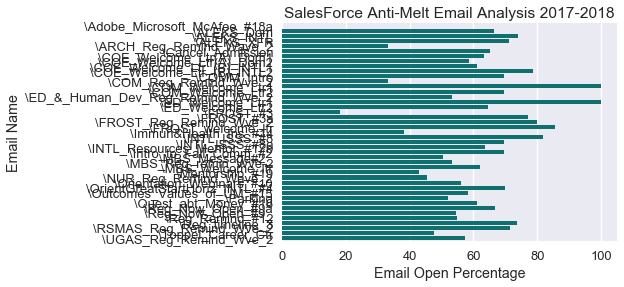

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')
color = sns.color_palette("Dark2",6)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1 = sns.barplot(y ='EmailName', x= 'Open%Plot', data = COMBOResults, color = "teal")
ax1.set(title = 'SalesForce Anti-Melt Email Analysis 2017-2018')
ax1.set_xlabel('Email Open Percentage')
ax1.set_ylabel('Email Name')
#ax.legend(loc= 'best')


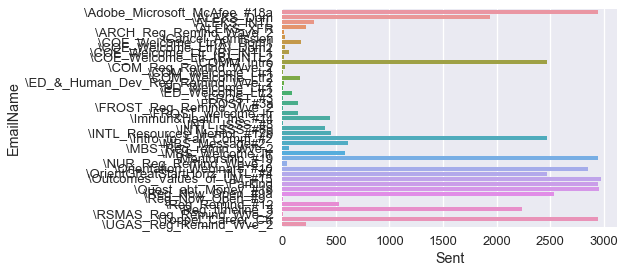

In [40]:
ax = sns.barplot(y ='EmailName', x= 'Sent', data = COMBOResults)


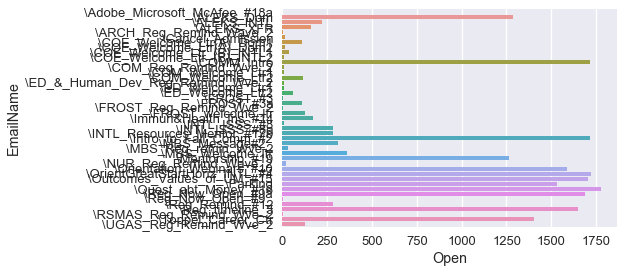

In [41]:
ax2 =sns.barplot(y ='EmailName', x= 'Open', data = COMBOResults)

In [42]:
#ax3 =sns.barplot(y ='EmailName', x= 'Open%Plot', data = COMBOResults)

In [43]:
#ax4 =sns.barplot(y ='EmailName', x= 'Click%Plot', data = COMBOResults)

In [44]:
#MBS_Welcome['IntervalStartTime'] = pd.to_datetime(MBS_Welcome.IntervalStartTime)

In [45]:
#ax = MBS_Welcome.plot(x="IntervalStartTime", y = 'UniqueOpened')
#ax2 = MBS_Welcome.plot(x="IntervalStartTime", y = 'UniqueClicked', color ='r')

In [46]:
COMBOResults.head()


,EmailName,Header,Sent,Open,Unsub,Click,Bounce,SentMinusBounce,OpenRate,ClickRate,Open%,Click%,Open%Plot,Click%Plot
0,\Adobe_Microsoft_McAfee_#18a,Download the Adobe Suite today!,2943,1,0,0,1,2942,0.000340,0.000000,0.0%,0.0%,0.0,0.0
1,\ALEKS_Dom,ALEKS Math Placement Assessment Information,1934,1284,1,339,0,1934,0.663909,0.264019,66.4%,26.4%,66.4,26.4
2,\ALEKS_INTL,General policy regarding math placement,297,220,0,84,0,297,0.740741,0.381818,74.1%,38.2%,74.1,38.2
3,\ALEKS_XFR,ALEKS Math Placement Assessment Information,224,158,0,34,2,222,0.711712,0.215190,71.2%,21.5%,71.2,21.5
4,\ARCH_Reg_Remind_Wave_2,Registration closes July 9,15,5,0,1,0,15,0.333333,0.200000,33.3%,20.0%,33.3,20.0


In [47]:
COMBOResults['RunTotal'] = COMBOResults.Open.cumsum()



In [48]:
COMBOResults.head(3)

,EmailName,Header,Sent,Open,Unsub,Click,Bounce,SentMinusBounce,OpenRate,ClickRate,Open%,Click%,Open%Plot,Click%Plot,RunTotal
0,\Adobe_Microsoft_McAfee_#18a,Download the Adobe Suite today!,2943,1,0,0,1,2942,0.000340,0.000000,0.0%,0.0%,0.0,0.0,1
1,\ALEKS_Dom,ALEKS Math Placement Assessment Information,1934,1284,1,339,0,1934,0.663909,0.264019,66.4%,26.4%,66.4,26.4,1285
2,\ALEKS_INTL,General policy regarding math placement,297,220,0,84,0,297,0.740741,0.381818,74.1%,38.2%,74.1,38.2,1505


In [49]:
COMBO = COMBOResults[['EmailName','Header','Sent','Open','Open%','RunTotal']]

In [50]:
COMBO.head()

,EmailName,Header,Sent,Open,Open%,RunTotal
0,\Adobe_Microsoft_McAfee_#18a,Download the Adobe Suite today!,2943,1,0.0%,1
1,\ALEKS_Dom,ALEKS Math Placement Assessment Information,1934,1284,66.4%,1285
2,\ALEKS_INTL,General policy regarding math placement,297,220,74.1%,1505
3,\ALEKS_XFR,ALEKS Math Placement Assessment Information,224,158,71.2%,1663
4,\ARCH_Reg_Remind_Wave_2,Registration closes July 9,15,5,33.3%,1668


In [51]:
COMBO = COMBO.rename(columns ={'Open%':'PercentOpen'})

In [52]:
#how to write results to excel
import xlsxwriter

In [57]:
writer = pd.ExcelWriter('COMBOResults2.xlsx', engine = 'xlsxwriter')

In [58]:
COMBOResults.to_excel(writer, sheet_name = 'Results')

In [59]:
workbook = writer.book
worksheet = writer.sheets['Results']

In [60]:
writer.save()